# import 

In [ ]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

# loop over and load in behavioural data from useable mirs
def find_organised_path(mir,dat_path):
    dat_path_2 = None
    recording = None
    print(mir)
    for animal_implant in os.listdir(dat_path):
        current_m_i = '_'.join([animal_implant.split('_')[0],animal_implant.split('_')[-1][-1]])
        mi = '_'.join(mir.split('_')[0:-1])
        if current_m_i == mi:
            dat_path_2 = os.path.join(dat_path,animal_implant)
            break
    print(dat_path_2)
    for ind,item in enumerate([record.split('ing')[-1].split('_')[0] for record in os.listdir(dat_path_2)]):
        if item == mir.split('_')[-1]:
            recording = os.listdir(dat_path_2)[ind]
    full_org_dat_path = os.path.join(dat_path_2,recording)
    print(full_org_dat_path)
    return full_org_dat_path

# determine electrode positions for each mouse

In [202]:
# animal_list = ['seq006_1_1','seq006_1_2','seq006_1_3','seq006_1_4','seq006_1_5','seq006_1_6','seq006_1_7','seq006_1_8','seq006_1_9','seq006_1_10','seq006_1_11',
# 'seq007_1_1','seq007_1_2','seq007_1_3','seq007_1_4',
# 'seq008_1_1','seq008_1_2','seq008_1_3','seq008_1_4',
# 'seq120_1_1','seq120_1_2','seq120_1_3','seq120_1_4','seq120_1_5','seq120_1_6','seq120_1_7','seq120_1_8']

dat_path = r'Z:\projects\sequence_squad\revision_data\organised_data\animals\\'

# load manually traced probe locations
probe_locations_df = pd.read_csv(r"Z:\projects\sequence_squad\revision_data\emmett_revisions\oscillations\hippocampus_lfp\probe_locations.csv")

# Load Hpx Allen slice
atlas_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\oscillations\hippocampus_lfp\hpc_ref.tif"
atlas_img = np.array(Image.open(atlas_path))

mir = 'seq120_1_1'

organised_path = find_organised_path(mir,dat_path)

ksort_directory = organised_path + r'\ephys\probeB\kilosort4_output\sorter_output\\'

probe_locactions = pd.read_csv(ksort_directory + 'extracted__template_shank_x_depth_tracks.csv')

probe_depth = pd.read_csv(ksort_directory + 'extracted__template_shank_x_depth.csv')


mouse_id = probe_locations_df.mouse_id.unique()[[item in mir for item in probe_locations_df.mouse_id.unique()]][0]
current_probe_locations = probe_locations_df[probe_locations_df.mouse_id == mouse_id]
B_probe = current_probe_locations[current_probe_locations.probe == 'B']
A_probe = current_probe_locations[current_probe_locations.probe == 'A']


seq120_1_1
Z:\projects\sequence_squad\revision_data\organised_data\animals\\seq120_implant1
Z:\projects\sequence_squad\revision_data\organised_data\animals\\seq120_implant1\recording1_30-07-2025


c:\miniconda\envs\analysis_main\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


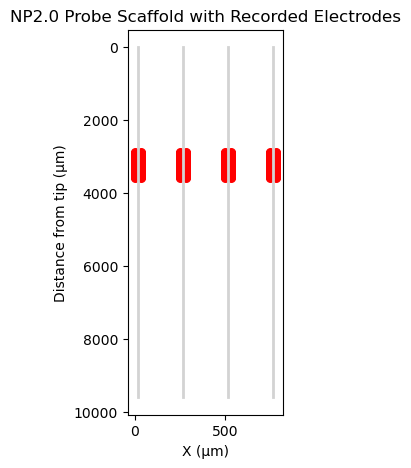

In [203]:
import numpy as np
import matplotlib.pyplot as plt

# Load recorded electrodes
channel_positions = np.load(ksort_directory + "channel_positions.npy")
x_rec, y_rec = channel_positions[:,0], channel_positions[:,1]

# Identify shanks by clustering x positions
# NP2.0 has 4 shanks
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(x_rec.reshape(-1,1))
shank_ids = kmeans.labels_

plt.figure(figsize=(2,5))

# Plot shank scaffolds aligned with electrode clusters
shank_length = 9600  # µm, full shank length
for shank in range(4):
    x_center = x_rec[shank_ids == shank].mean()
    plt.plot([x_center, x_center], [0, shank_length], color="lightgrey", linewidth=2)

# Plot recorded electrodes on top
plt.scatter(x_rec, y_rec, color="red", s=30)

plt.gca().invert_yaxis()
plt.xlabel("X (µm)")
plt.ylabel("Distance from tip (µm)")
plt.title("NP2.0 Probe Scaffold with Recorded Electrodes")
plt.show()



c:\miniconda\envs\analysis_main\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Vector differences (entry - tip):
[[ -54.    -484.5  ]
 [ -52.5   -473.5  ]
 [ -46.    -462.167]
 [ -34.333 -460.667]]

Euclidean distances (pixels):
[487.5        476.40161629 464.45057422 461.94462848]

Distances in µm:
[4875.         4764.01616286 4644.50574215 4619.44628476]


c:\miniconda\envs\analysis_main\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


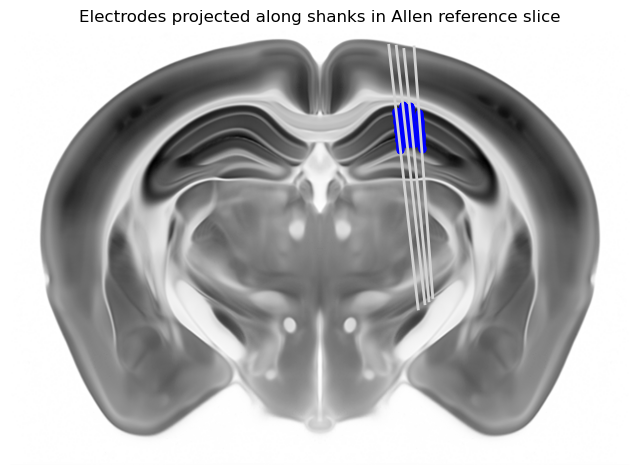

In [204]:




# 1. Load Allen slice
atlas_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\oscillations\hippocampus_lfp\hpc_ref.tif"
atlas_img = np.array(Image.open(atlas_path))

# 2. Load electrode positions in probe coordinates
channel_positions = np.load(ksort_directory + "channel_positions.npy")
x_probe, y_probe = channel_positions[:,0], channel_positions[:,1]

# 3. Cluster electrodes by shank
n_shanks = 4
shank_ids = KMeans(n_clusters=n_shanks, random_state=0).fit(x_probe.reshape(-1,1)).labels_

# 4. Tip and entry points in Allen pixel coordinates
# Filter tips and entries
tips_df = B_probe[B_probe["position"] == "tip"].sort_values("shank")
entries_df = B_probe[B_probe["position"] == "entry"].sort_values("shank")

# Extract x and y into arrays
tips = tips_df[["x", "y"]].to_numpy()
entries = entries_df[["x", "y"]].to_numpy()
    

# Vector difference (entry - tip)
diffs = entries - tips  # shape (4,2)
print("Vector differences (entry - tip):")
print(diffs)

# Euclidean distances
distances = np.linalg.norm(diffs, axis=1)
print("\nEuclidean distances (pixels):")
print(distances)

# Convert to microns (Allen atlas has 10 µm per pixel)
distances_um = distances * 10
print("\nDistances in µm:")
print(distances_um)

# Load channel positions and channel map
channel_positions = np.load(ksort_directory + "channel_positions.npy")
channel_map = np.load(ksort_directory + "channel_map.npy")  # indices of recorded electrodes

x, y = channel_positions[:,0], channel_positions[:,1]

# Cluster by x-coordinate into 4 shanks
n_shanks = 4
kmeans = KMeans(n_clusters=n_shanks, random_state=0).fit(x.reshape(-1,1))
shank_ids = kmeans.labels_

# Create a DataFrame
electrodes_df = pd.DataFrame({
    'x_probe': x,
    'y_probe': y,
    'shank': shank_ids,
    'channel_index': np.arange(len(x))  # index of each electrode
})



##### plot this as fraction along shank 

# Initialize array to store projected positions
electrode_allen = np.zeros((len(electrodes_df), 2))

for shank in range(0, 4):  # assuming shank labels 1-4
    mask = electrodes_df['shank'] == shank
    y_shank = electrodes_df.loc[mask, 'y_probe'].values

    # Fraction along the probe (0 = tip, 1 = top of probe in probe coords)
    frac = y_shank/ distances_um[shank]

    # Vector along shank in Allen coordinates (entry - tip)
    shank_vec = entries[shank-1] - tips[shank-1]

    # Scale shank_vec to match Allen pixel distance corresponding to distance_um
    shank_vec_pixel = shank_vec  # If coordinates are in pixels; else convert using 10 µm per pixel

    # Project electrodes
    electrode_allen[mask] = tips[shank-1] + np.outer(frac, shank_vec_pixel)

# Plot
plt.figure(figsize=(8,8))
plt.imshow(atlas_img, cmap='gray')

# Draw shank lines
for shank in range(4):
    plt.plot([tips[shank,0], entries[shank,0]],
             [tips[shank,1], entries[shank,1]],
             color='lightgrey', linewidth=2)

# Plot electrodes
plt.scatter(electrode_allen[:,0], electrode_allen[:,1], color='blue', s=20)
plt.title("Electrodes projected along shanks in Allen reference slice")
plt.axis('off')
plt.show()


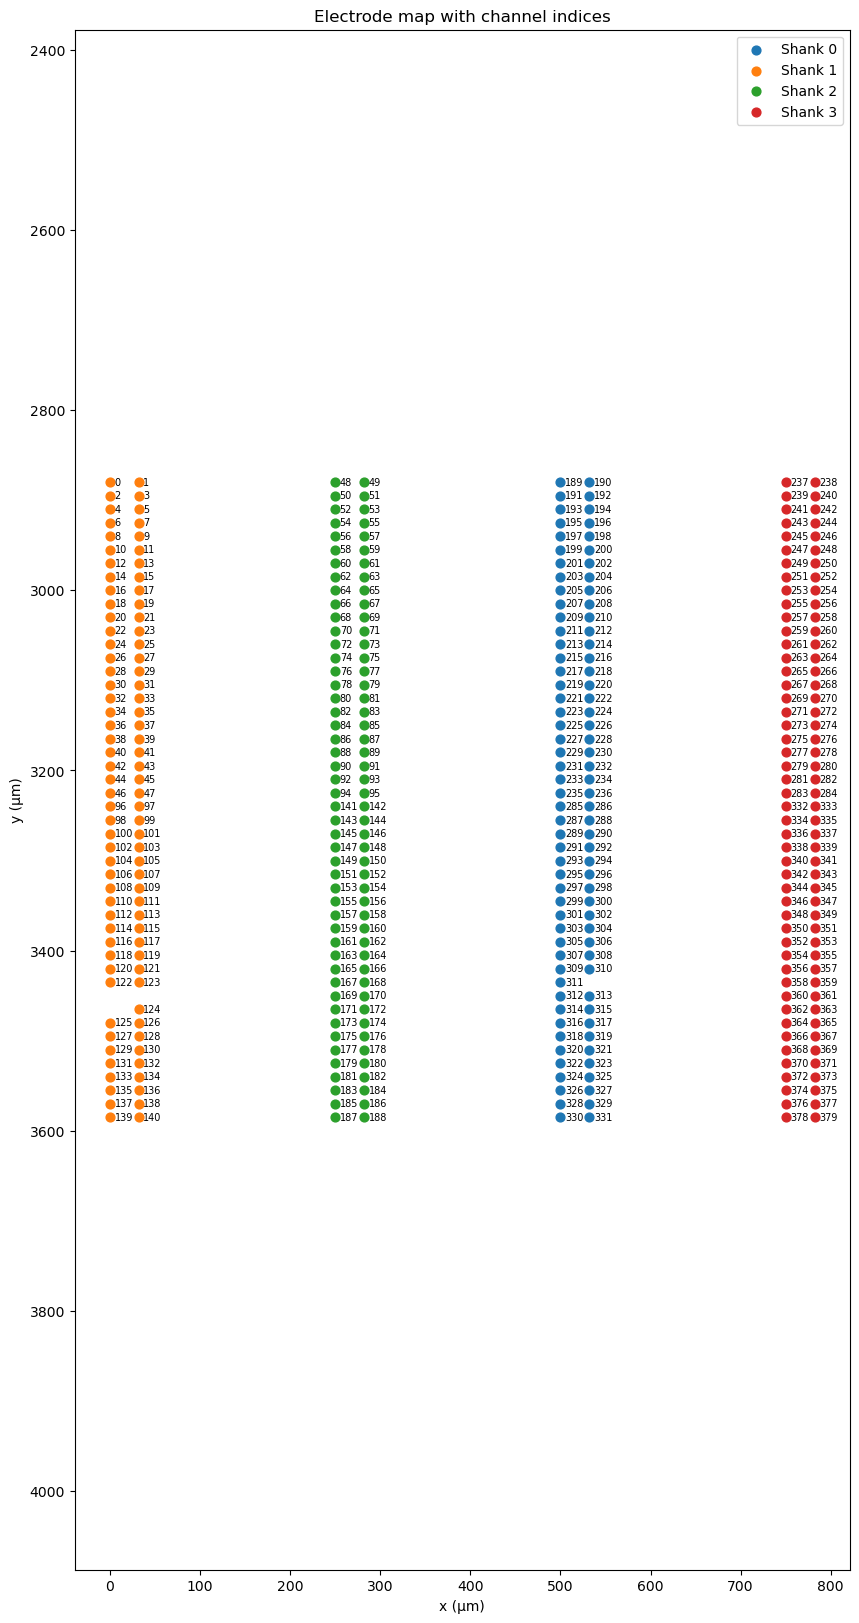

In [205]:
import matplotlib.pyplot as plt

# Use your electrodes_df
x = electrodes_df["x_probe"].values
y = electrodes_df["y_probe"].values
labels = electrodes_df["channel_index"].values
shanks = electrodes_df["shank"].values

plt.figure(figsize=(10,20))

# Plot electrodes per shank
for shank in np.unique(shanks):
    mask = shanks == shank
    plt.scatter(x[mask], y[mask], s=40, label=f"Shank {shank}")

    # Add labels for each electrode
    for xi, yi, lab in zip(x[mask], y[mask], labels[mask]):
        plt.text(xi+5, yi, str(lab),
                 fontsize=7, ha='left', va='center', color='black')

plt.gca().invert_yaxis()  # depth increases downward
plt.xlabel("x (µm)")
plt.ylabel("y (µm)")
plt.title("Electrode map with channel indices")
plt.legend()
plt.axis("equal")

plt.show()

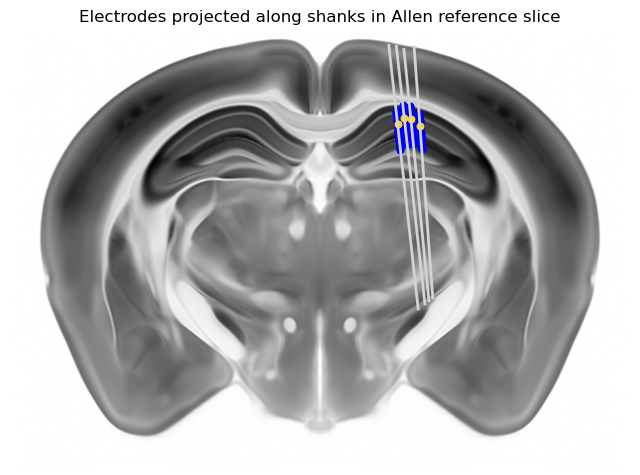

In [220]:
electrodes_to_use = [110,111,155,156,299,300,346,347]

es_used = electrodes_df[electrodes_df.channel_index.isin(electrodes_to_use)]

# Plot
plt.figure(figsize=(8,8))
plt.imshow(atlas_img, cmap='gray')

# Draw shank lines
for shank in range(4):
    plt.plot([tips[shank,0], entries[shank,0]],
             [tips[shank,1], entries[shank,1]],
             color='lightgrey', linewidth=2)

# Plot electrodes
plt.scatter(electrode_allen[:,0], electrode_allen[:,1], color='blue', s=20)
plt.title("Electrodes projected along shanks in Allen reference slice")
plt.axis('off')

# Plot electrodes
plt.scatter(electrode_allen[electrodes_to_use][:,0], electrode_allen[electrodes_to_use][:,1], color='gold', s=20)
plt.title("Electrodes projected along shanks in Allen reference slice")
plt.axis('off')

#save out electrode locals 
electrodes_used_xy = electrode_allen[electrodes_to_use][:,0], electrode_allen[electrodes_to_use][:,1]
np.save(r'Z:\projects\sequence_squad\revision_data\emmett_revisions\oscillations\hippocampus_lfp\hpc_electrode_locations\\' + mir + 'npy',np.array(electrodes_used_xy))


# plot all the electrode positions

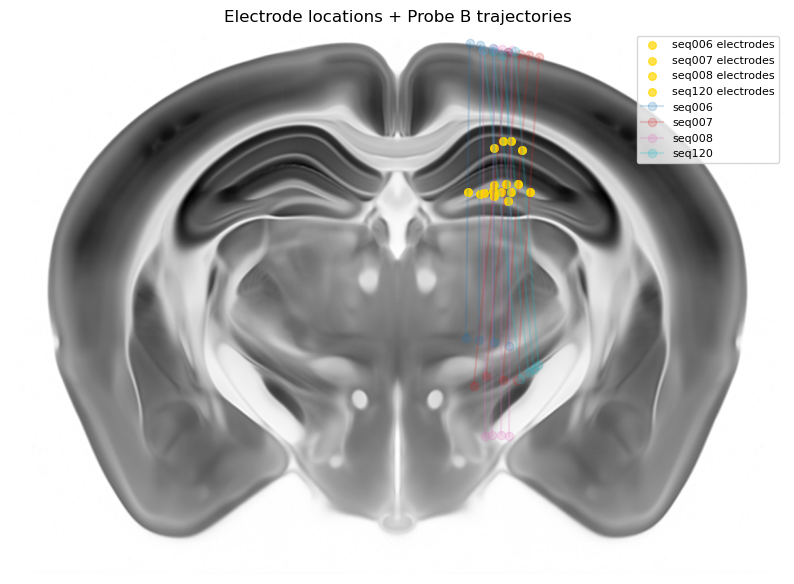

In [231]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm

# ---- Paths ----
electrode_locations_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\oscillations\hippocampus_lfp\hpc_electrode_locations\\"
atlas_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\oscillations\hippocampus_lfp\hpc_ref.tif"

# ---- Load atlas image ----
atlas_img = np.array(Image.open(atlas_path))

# ---- Load electrode locations ----
electrode_files = sorted([f for f in os.listdir(electrode_locations_path) if f.endswith(".npy")])

electrode_data = {}
for f in electrode_files:
    mouse_id = f.split("_")[0]  # assuming filename like seq006_1_1npy.npy
    arr = np.load(os.path.join(electrode_locations_path, f))
    electrode_data[mouse_id] = arr

# ---- Filter probe B trajectories ----
df_probeB = probe_locations_df[probe_locations_df["probe"]=="B"]

trajectories = []
for (mouse_id, shank), grp in df_probeB.groupby(["mouse_id", "shank"]):
    entry = grp[grp["position"]=="entry"].iloc[0]
    tip   = grp[grp["position"]=="tip"].iloc[0]
    trajectories.append({
        "mouse_id": mouse_id,
        "shank": shank,
        "entry": (entry["x"], entry["y"]),
        "tip": (tip["x"], tip["y"])
    })

# ---- Assign colors per mouse_id ----
unique_mice = sorted(set(t["mouse_id"] for t in trajectories))
colors = cm.tab10(np.linspace(0,1,len(unique_mice)))
mouse_color_map = {mouse: colors[i] for i, mouse in enumerate(unique_mice)}

# ---- Plot ----
plt.figure(figsize=(10,10))
plt.imshow(atlas_img, cmap="gray")

# Plot electrode locations
for mouse_id, arr in electrode_data.items():
    plt.scatter(arr[0], arr[1], s=30, label=f"{mouse_id} electrodes", alpha=0.7, color = 'gold')

# Plot probe B trajectories
for t in trajectories:
    col = mouse_color_map[t["mouse_id"]]
    x_vals = [t["entry"][0], t["tip"][0]]
    y_vals = [t["entry"][1], t["tip"][1]]
    plt.plot(x_vals, y_vals, marker="o", color=col, label=f'{t["mouse_id"]}-shank{t["shank"]}', alpha = 0.2)

# Legend: one per mouse_id for shanks
handles, labels = plt.gca().get_legend_handles_labels()
seen = {}
new_handles, new_labels = [], []
for h, l in zip(handles, labels):
    mid = l.split("-shank")[0]  # keep only mouse_id for shanks
    if "electrodes" in l:      # keep electrode entries separate
        new_handles.append(h)
        new_labels.append(l)
    elif mid not in seen:
        seen[mid] = True
        new_handles.append(h)
        new_labels.append(mid)
plt.legend(new_handles, new_labels, fontsize=8)

plt.axis("off")
plt.title("Electrode locations + Probe B trajectories")
plt.show()


# plot the striatum probe locations

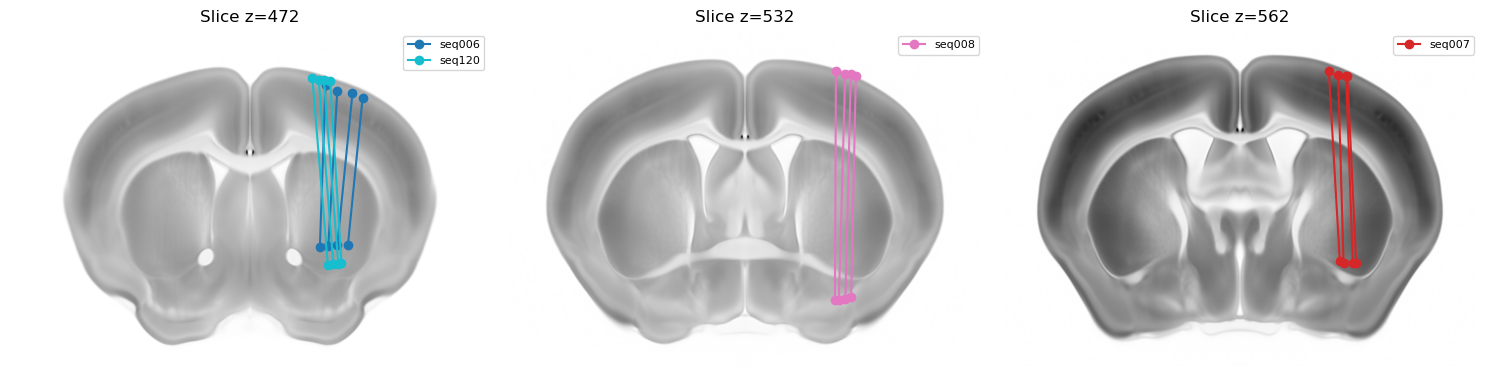

In [148]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.cm as cm

# load reference images
str_refs_path = r"Z:\projects\sequence_squad\revision_data\emmett_revisions\oscillations\hippocampus_lfp\str_refs\\"
# load manually traced probe locations
probe_locations_df = pd.read_csv(r"Z:\projects\sequence_squad\revision_data\emmett_revisions\oscillations\hippocampus_lfp\probe_locations.csv")

# Get all reference images
ref_files = sorted([f for f in os.listdir(str_refs_path) if f.endswith(".tif")],
                   key=lambda x: int(x.replace(".tif","")))

# Map filename to z
ref_zs = [int(f.replace(".tif","")) for f in ref_files]
ref_map = dict(zip(ref_zs, ref_files))

# Filter for probe A
df_probeA = probe_locations_df[probe_locations_df["probe"]=="A"]

# Collect trajectories: group by mouse_id + shank
trajectories = []
for (mouse_id, shank), grp in df_probeA.groupby(["mouse_id", "shank"]):
    entry = grp[grp["position"]=="entry"].iloc[0]
    tip   = grp[grp["position"]=="tip"].iloc[0]
    # pick closest z slice (based on average z of entry & tip)
    mean_z = np.mean([entry["z"], tip["z"]])
    closest_z = min(ref_zs, key=lambda z: abs(z-mean_z))
    trajectories.append({
        "mouse_id": mouse_id,
        "shank": shank,
        "entry": (entry["x"], entry["y"]),
        "tip":   (tip["x"], tip["y"]),
        "z": closest_z
    })

# Assign each mouse a consistent color
unique_mice = sorted(set(t["mouse_id"] for t in trajectories))
colors = cm.tab10(np.linspace(0,1,len(unique_mice)))
mouse_color_map = {mouse: colors[i] for i, mouse in enumerate(unique_mice)}

# Plot
unique_zs = sorted(set([t["z"] for t in trajectories]))
ncols = len(unique_zs)
fig, axes = plt.subplots(1, ncols, figsize=(5*ncols, 5))

if ncols == 1:  # if only one slice
    axes = [axes]

for ax, z in zip(axes, unique_zs):
    img = Image.open(os.path.join(str_refs_path, ref_map[z]))
    ax.imshow(img, cmap="gray")
    
    for t in [tr for tr in trajectories if tr["z"]==z]:
        col = mouse_color_map[t["mouse_id"]]
        x_vals = [t["entry"][0], t["tip"][0]]
        y_vals = [t["entry"][1], t["tip"][1]]
        ax.plot(x_vals, y_vals, marker="o", color=col,
                label=f'{t["mouse_id"]}-shank{t["shank"]}')
    
    ax.set_title(f"Slice z={z}")
    ax.axis("off")
    # show one legend entry per mouse_id (not per shank)
    handles, labels = ax.get_legend_handles_labels()
    seen = {}
    new_handles, new_labels = [], []
    for h, l in zip(handles, labels):
        mid = l.split("-shank")[0]
        if mid not in seen:
            seen[mid] = True
            new_handles.append(h)
            new_labels.append(mid)
    ax.legend(new_handles, new_labels, fontsize=8)

plt.tight_layout()
plt.show()


In [ ]:
# load in ephys data 
# map electrodes to depths...
# probe map or something...?
# chose a couple of electrodes based on depth to region info
# plot this position 

In [ ]:
## clean up the above script so its a bit smaller and works across mice (eg. entry and tip position stuff)
## using these channels, extract/downsample the LFP - save this out (what frequency are SWRs?)

# in a new script filter for and find sharp waves. save out sharp wave timepoints.


#1 project DLS probe locations and save them out. 
#2 save out hpc probe locaions + electrode locations
#3 save out electrode selection


#4 make a script that is like other one but takes data from selected electrodes. 
#5 run this shit - find SWRs
#6 check other data preprocessing runs